In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().any().sum() 

0

In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
X= df.values[:,0:-1] 
Y= df.values[:,-1]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
#split the data into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# List of classification models to try
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Iterate over the classifiers and train, predict, and evaluate each model
for name, classifier in classifiers.items():
    print(f"--- {name} ---")
    
    # Fitting the model to the training data
    classifier.fit(X_train, Y_train)
    
    # Making predictions on the test data
    Y_pred = classifier.predict(X_test)
    
    # Generating the confusion matrix
    cfm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:\n", cfm)
    
    # Generating the classification report
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    
    # Calculating the accuracy
    acc = accuracy_score(Y_test, Y_pred)
    print("Accuracy of the model:", acc)
    print("\n")

--- Logistic Regression ---
Confusion Matrix:
 [[129  15]
 [ 44  43]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.81       144
         1.0       0.74      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.70       231
weighted avg       0.74      0.74      0.73       231

Accuracy of the model: 0.7445887445887446


--- Decision Tree ---
Confusion Matrix:
 [[117  27]
 [ 41  46]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       144
         1.0       0.63      0.53      0.58        87

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

Accuracy of the model: 0.7056277056277056


--- Random Forest ---
Confusion Matrix:
 [[131  13]
 [ 46  41]]
Classificati

# Logistic Regression Tuning

In [10]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the LogisticRegression model
logistic_regressor = LogisticRegression(random_state=10)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalties
    'C': [0.01, 0.1, 1, 10, 100],                   # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],       # Solvers that work with the specified penalties
    'max_iter': [100, 200, 500],                    # Number of iterations to converge
    'l1_ratio': [0, 0.5, 1]                         # Used only for 'elasticnet'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regressor,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    verbose=1,            # Display progress
    scoring='accuracy'    # Use accuracy to evaluate models
)

# Fit the grid search model on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Use the best estimator to make predictions on the test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Print the predictions
print(Y_pred)

# Evaluate the best model
cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cfm)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found by GridSearchCV:
{'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
Confusion Matrix:
 [[130  14]
 [ 47  40]]
Classification Report:
               precision    recall  f1-s

# Random Forest Classifier Tuning

In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the RandomForestClassifier model
random_forest_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_classifier, 
    param_grid=param_grid, 
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    verbose=1,            # Display progress
    scoring='accuracy'    # Use accuracy to evaluate models
)

# Fit the grid search model on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Use the best estimator to make predictions on the test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Print the predictions
print(Y_pred)

# Evaluate the best model
cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cfm)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
Confusion Matrix:
 [[133  11]
 [ 45  42]]
Classification Report:
               pre

# Gradient Boosting Classifier Tuning

In [12]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the model
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gradient_boosting_classifier, 
    param_grid=param_grid, 
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    verbose=1,            # Display progress
    scoring='accuracy'    # Use accuracy to evaluate models
)

# Fit the model on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Use the best estimator to make predictions on the test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Print the predictions
print(Y_pred)

# Evaluate the model
cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cfm)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found by GridSearchCV:
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
Confusion Matrix:
 [[121  23]
 [ 33  54]]
Classification Report:
               precis

In [13]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]


In [14]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.58229788, 0.41770212],
       [0.75449695, 0.24550305],
       [0.55340197, 0.44659803],
       [0.98321691, 0.01678309],
       [0.92903886, 0.07096114],
       [0.9942469 , 0.0057531 ],
       [0.94253856, 0.05746144],
       [0.49186409, 0.50813591],
       [0.94934265, 0.05065735],
       [0.34681512, 0.65318488],
       [0.98294987, 0.01705013],
       [0.89935142, 0.10064858],
       [0.03886207, 0.96113793],
       [0.86306541, 0.13693459],
       [0.90981087, 0.09018913],
       [0.14063243, 0.85936757],
       [0.19068992, 0.80931008],
       [0.97317604, 0.02682396],
       [0.95372124, 0.04627876],
       [0.04658593, 0.95341407],
       [0.49836375, 0.50163625],
       [0.54679251, 0.45320749],
       [0.50142052, 0.49857948],
       [0.54731103, 0.45268897],
       [0.85528579, 0.14471421],
       [0.33553653, 0.66446347],
       [0.95817011, 0.04182989],
       [0.79169365, 0.20830635],
       [0.34163282, 0.65836718],
       [0.12665949, 0.87334051],
       [0.

In [15]:
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.

In [16]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.58229788 0.41770212]
 [0.75449695 0.24550305]
 [0.55340197 0.44659803]
 [0.98321691 0.01678309]
 [0.92903886 0.07096114]
 [0.9942469  0.0057531 ]
 [0.94253856 0.05746144]
 [0.49186409 0.50813591]
 [0.94934265 0.05065735]
 [0.34681512 0.65318488]
 [0.98294987 0.01705013]
 [0.89935142 0.10064858]
 [0.03886207 0.96113793]
 [0.86306541 0.13693459]
 [0.90981087 0.09018913]
 [0.14063243 0.85936757]
 [0.19068992 0.80931008]
 [0.97317604 0.02682396]
 [0.95372124 0.04627876]
 [0.04658593 0.95341407]
 [0.49836375 0.50163625]
 [0.54679251 0.45320749]
 [0.50142052 0.49857948]
 [0.54731103 0.45268897]
 [0.85528579 0.14471421]
 [0.33553653 0.66446347]
 [0.95817011 0.04182989]
 [0.79169365 0.20830635]
 [0.34163282 0.65836718]
 [0.12665949 0.87334051]
 [0.89379298 0.10620702]
 [0.98343241 0.01656759]
 [0.97996385 0.02003615]
 [0.90079333 0.09920667]
 [0.74012093 0.25987907]
 [0.92175946 0.07824054]
 [0.87219824 0.12780176]
 [0.85470234 0.14529766]
 [0.10848457 0.89151543]
 [0.96857263 0.03142737]


# ADJUSTMENT OF THRESHOLD

In [17]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [18]:
# Evaluate the model
cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cfm)

print("Classification Report:\n", classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


Confusion Matrix:
 [[128  16]
 [ 33  54]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       144
         1.0       0.77      0.62      0.69        87

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

Accuracy of the model:  0.7878787878787878


In [19]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
#print("Threshold: {} TotalER: {}  Type 2: {}   Type 1: {}".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))    
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
         cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 56  , type 2 error : 30  , type 1 error: 26
Errors at threshold  0.41000000000000003 : 55  , type 2 error : 30  , type 1 error: 25
Errors at threshold  0.42000000000000004 : 52  , type 2 error : 30  , type 1 error: 22
Errors at threshold  0.43000000000000005 : 52  , type 2 error : 31  , type 1 error: 21
Errors at threshold  0.44000000000000006 : 52  , type 2 error : 31  , type 1 error: 21
Errors at threshold  0.45000000000000007 : 51  , type 2 error : 31  , type 1 error: 20
Errors at threshold  0.4600000000000001 : 52  , type 2 error : 33  , type 1 error: 19
Errors at threshold  0.4700000000000001 : 51  , type 2 error : 33  , type 1 error: 18
Errors at threshold  0.4800000000000001 : 50  , type 2 error : 33  , type 1 error: 17
Errors at threshold  0.4900000000000001 : 50  , type 2 error : 33  , type 1 error: 17
Errors at threshold  0.5000000000000001 : 49  , type 2 error : 33  , type 1 error: 16
Errors at threshold  0.5100000000000001 : 51  , type 2 error : 3

# AUC and ROC Curve

In [20]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8271871008939975


0.8271871008939975


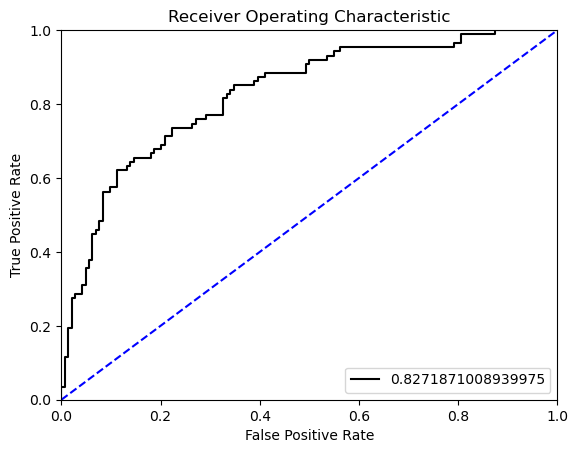

In [21]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'black', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

In [22]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7513170498084291
[0.         0.11805556 1.        ]
[0.         0.62068966 1.        ]


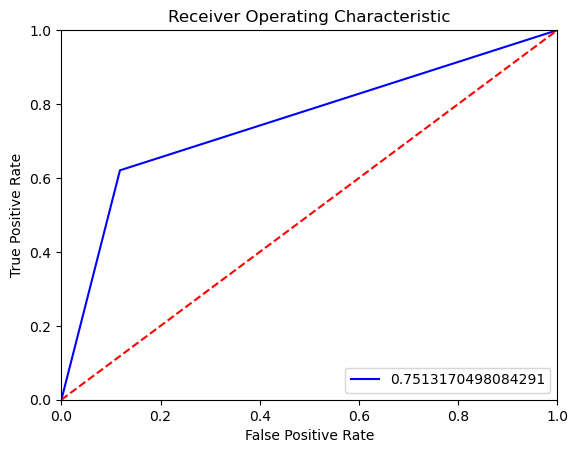

In [23]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [24]:
random_forest_classifier.fit(X_train, Y_train)

predictions = random_forest_classifier.predict(X_test)

In [25]:
predictions

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0.